Ques5. Part A - Construct the Yeast Protein Interactome (YPI) using data available from Yeast Interactome
Database (http://interactome.dfci.harvard.edu/S_cerevisiae/). Plot its degree distribution as
well as C(k) × k plot. Visualize the network using Cytoscape and highlight importance of a
protein in terms of its degree/connectivity.

Number of nodes (proteins): 1278
Number of interactions: 1809


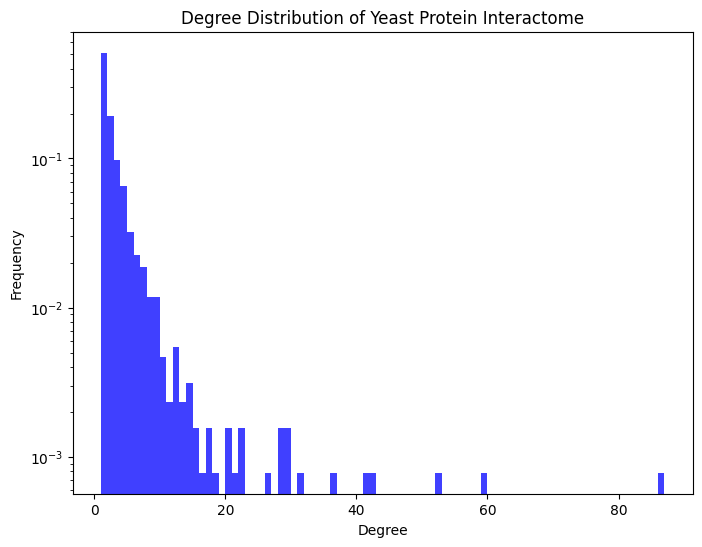

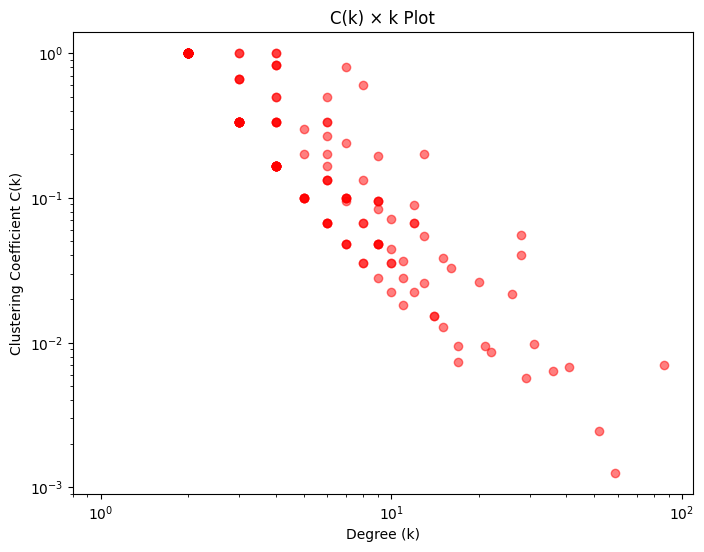

Graph exported as '/home/akash/Music/NS_A2/A2_submission/yeast_protein_interactome.graphml' for Cytoscape visualization.
The most connected protein is YLR291C with 87 interactions.
The average degree of the network is 2.83
YLR291C is a hub protein, meaning it has significantly more interactions than the average protein in the network. 
In the Yeast Protein Interactome, the degree of a protein represents its connectivity, indicating how many other proteins it interacts with. 
High-degree proteins, known as hub proteins,play crucial roles in cellular processes, often acting as central regulators or essential components in biological pathways. 
Identifying these hub proteins can help in understanding critical interactions, potential drug targets, and overall network stability.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
file_path = 'CCSB-Y2H.txt'
df = pd.read_csv(file_path, sep='\t', header=None, names=['Protein1', 'Protein2', 'Source'])

# Construct the Yeast Protein Interactome (YPI) network
G = nx.Graph()
G.add_edges_from(zip(df['Protein1'], df['Protein2']))

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes (proteins): {num_nodes}")
print(f"Number of interactions: {num_edges}")

# Ploting degree distribution
degrees = [deg for _, deg in G.degree()]
plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=range(1, max(degrees)+1), density=True, alpha=0.75, color='b')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Yeast Protein Interactome')
plt.yscale('log')
plt.show()

# Computing clustering coefficient and ploting C(k) × k
ck = nx.average_clustering(G, count_zeros=True)
k_values = np.array(degrees)
c_k_values = np.array([nx.clustering(G, node) for node in G.nodes()])

plt.figure(figsize=(8, 6))
plt.scatter(k_values, c_k_values, alpha=0.5, color='r')
plt.xlabel('Degree (k)')
plt.ylabel('Clustering Coefficient C(k)')
plt.title('C(k) × k Plot')
plt.xscale('log')
plt.yscale('log')
plt.show()

#YPI Network Construction
output_path = "/home/akash/Music/NS_A2/A2_submission/yeast_protein_interactome.graphml"
nx.write_graphml(G, output_path)
print(f"Graph exported as '{output_path}' for Cytoscape visualization.")

# Highlighting the importance of protein in terms of degree
most_connected = max(G.degree, key=lambda x: x[1])
print(f"The most connected protein is {most_connected[0]} with {most_connected[1]} interactions.")

average_degree = np.mean(degrees)
print(f"The average degree of the network is {average_degree:.2f}")

print(f"{most_connected[0]} is a hub protein, meaning it has significantly more interactions than the average protein in the network. \nIn the Yeast Protein Interactome, the degree of a protein represents its connectivity, indicating how many other proteins it interacts with. \nHigh-degree proteins, known as hub proteins,play crucial roles in cellular processes, often acting as central regulators or essential components in biological pathways. \nIdentifying these hub proteins can help in understanding critical interactions, potential drug targets, and overall network stability.")



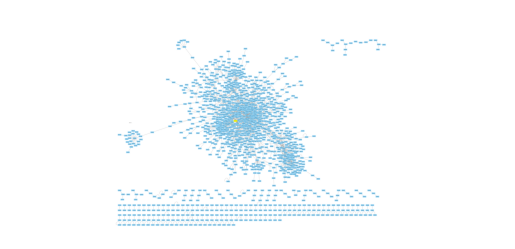

In [39]:
#CYTOSCAPE VISUALIZATION
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("CCSB-Y2H.txt.png")

plt.imshow(image)
plt.axis("off")
plt.show()


Part B - Identify key proteins in YPI based on their number of interactions. Compute and plot the
fraction of proteins that are essential for a given degree (k). (Find the information of
essential genes from existing data sources from the internet.)

In [7]:
# AS PER THE ANNOUNCEMENT WE HAVE SKIPPED THIS PART OF THE QUESTION 

Part C - Implement the random and targeted node deletion strategies (Refer to Question 3
above) for YPI. Compute and plot the robustness (S and < s >) of YPI for these
strategies.

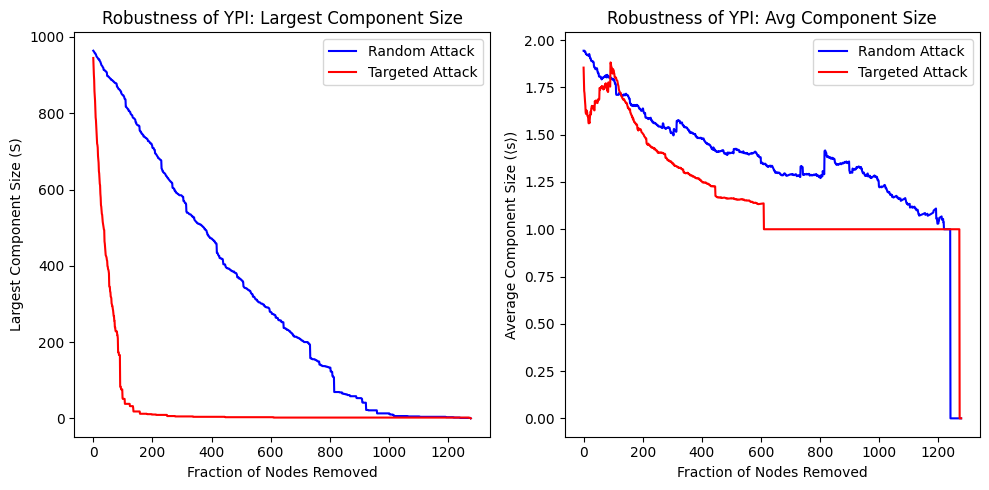

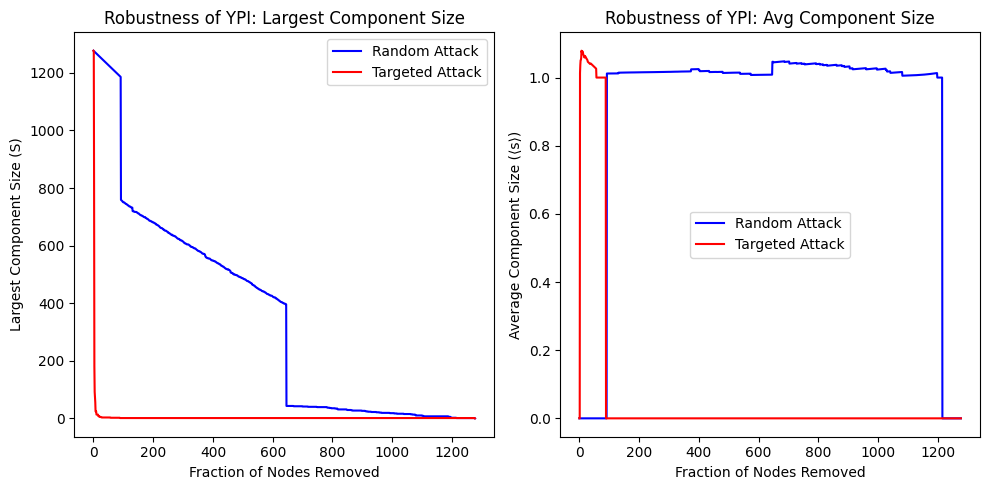

In [ ]:

import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


#Random and targeted node deletion strategies for YPI.
def gen_BA_mod(n, m, alpha=1, seed=None):
    if seed:
        random.seed(seed)
        np.random.seed(seed)
    
    G = nx.complete_graph(m)
    for nn in range(m, n):
        degrees = np.array([G.degree(n) for n in G.nodes()]) ** alpha
        prob = degrees / degrees.sum()
        targets = np.random.choice(list(G.nodes()), min(m, len(G)), replace=False, p=prob)
        G.add_edges_from((nn, t) for t in targets)
    
    return G

def comp_robust(G, remove_order):
    #Computes robustness metrics S and <s> for a given node removal order.
    S_values, s_values = [], []
    G_copy = G.copy()
    for node in remove_order:
        G_copy.remove_node(node)
        if len(G_copy) == 0:
            S_values.append(0)
            s_values.append(0)
            break
        largest_cc = max(nx.connected_components(G_copy), key=len, default=set())
        S_values.append(len(largest_cc))
        left_ccs = []  
        for cc in nx.connected_components(G_copy):  
            if len(cc) < len(largest_cc):  
                left_ccs.append(len(cc))  

        if left_ccs:  
            s_values.append(np.mean(left_ccs))  
        else:  
            s_values.append(0)  
    return S_values, s_values

def plot_robust(S_random, s_random, S_targeted, s_targeted):
    #Plots robustness metrics for random and targeted attacks.
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(S_random, label='Random Attack', color='blue')
    plt.plot(S_targeted, label='Targeted Attack', color='red')
    plt.xlabel('Fraction of Nodes Removed')
    plt.ylabel('Largest Component Size (S)')
    plt.legend()
    plt.title('Robustness of YPI: Largest Component Size')
    
    plt.subplot(1, 2, 2)
    plt.plot(s_random, label='Random Attack', color='blue')
    plt.plot(s_targeted, label='Targeted Attack', color='red')
    plt.xlabel('Fraction of Nodes Removed')
    plt.ylabel('Average Component Size (⟨s⟩)')
    plt.legend()
    plt.title('Robustness of YPI: Avg Component Size')
    
    plt.tight_layout()
    plt.show()

# Load YPI network from the dataset
def load_G(file_path):
    G = nx.Graph()
    with open(file_path, 'r') as f:
        for line in f:
            nodes = line.strip().split('\t')[:2]
            G.add_edge(nodes[0], nodes[1])
    return G

# Load graph
file_path = 'CCSB-Y2H.txt'
G_ypi = load_G(file_path)

# Generate modified BA model for comparison
n_mod = len(G_ypi.nodes())
m_mod = 3
G_ba = gen_BA_mod(n_mod, m_mod, alpha=2, seed=42)

# Random node deletion
remove_rand_ypi = list(G_ypi.nodes())
random.shuffle(remove_rand_ypi)
S_random_ypi, s_random_ypi = comp_robust(G_ypi, remove_rand_ypi)

remove_rand_ba = list(G_ba.nodes())
random.shuffle(remove_rand_ba)
S_random_ba, s_random_ba = comp_robust(G_ba, remove_rand_ba)

# Targeted node deletion (highest-degree first)
nodes_sorted_ypi = sorted(G_ypi.nodes(), key=G_ypi.degree, reverse=True)
nodes_sorted_ba = sorted(G_ba.nodes(), key=G_ba.degree, reverse=True)

S_targeted_ypi, s_targeted_ypi = comp_robust(G_ypi, nodes_sorted_ypi)
S_targeted_ba, s_targeted_ba = comp_robust(G_ba, nodes_sorted_ba)

# Plot robustness
plot_robust(S_random_ypi, s_random_ypi, S_targeted_ypi, s_targeted_ypi)
plot_robust(S_random_ba, s_random_ba, S_targeted_ba, s_targeted_ba)